

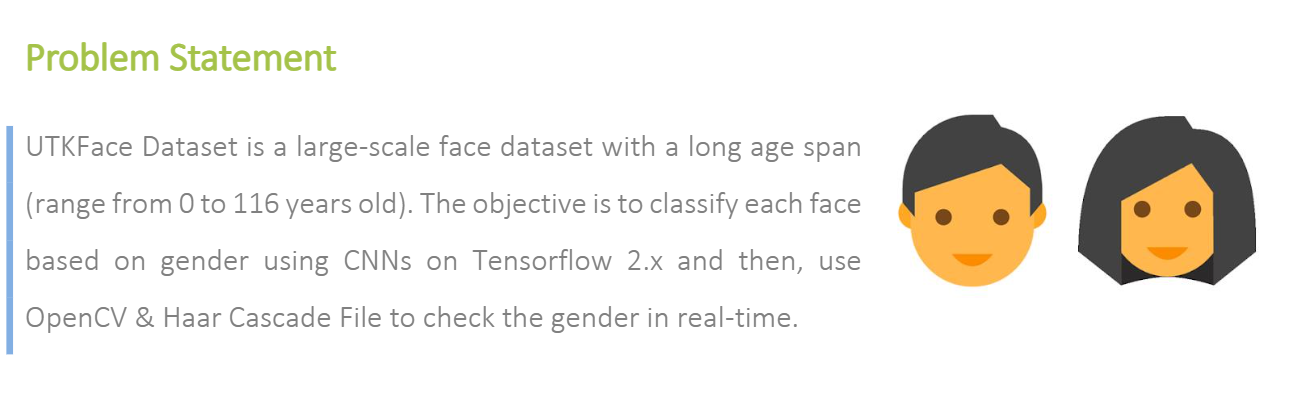

Dataset link :https://susanqq.github.io/UTKFace/

Dataset Description:

UTKFace DatasetTotal Images: 

The Dataset consists of over 20,000 Face ImagesThe images cover large variationsin pose, facial expression, illumination, resolution, etc. This dataset could be used on a variety of tasks, e.g.,face detection, age estimation, gender detection, landmark localization, etc.

You will be using the Aligned & Cropped Faces Datasetfrom theUTKFace Dataset

### Importing prewritten helper functions which i have saved in my github for easier dataset exploration .Please check the .py file at the specified link incase of any queries

In [ ]:
!wget https://raw.githubusercontent.com/hegdekaushik98/tensorflow-deep-learning/main/extras/helper_functions.py


--2021-06-07 17:30:05--  https://raw.githubusercontent.com/hegdekaushik98/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-06-07 17:30:06 (74.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
import helper_functions as hf

In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


# Dataset 

In [ ]:
unzip_data('/content/drive/MyDrive/DL Emotion Gender/Module_7_Demos/Gender Dataset UTK/UTKFace.zip')

In [ ]:
unzip_data('/content/drive/MyDrive/DL Emotion Gender/Module_7_Demos/Gender Dataset UTK/UTK.zip')

In [ ]:
base_dir = '/content/drive/MyDrive/DL Emotion Gender/Module_7_Demos/Gender Dataset UTK'

In [ ]:
walk_through_dir('/content/UTKFace')

There are 0 directories and 23708 images in '/content/UTKFace'.


In [ ]:
walk_through_dir('/content/UTK')

There are 1 directories and 0 images in '/content/UTK'.
There are 0 directories and 575 images in '/content/UTK/crop_part1'.


In [ ]:
train_dir = '/content/UTKFace'
test_dir = '/content/UTK/crop_part1'

In [ ]:
walk_through_dir(train_dir)

There are 0 directories and 23708 images in '/content/UTKFace'.


In [ ]:
walk_through_dir(test_dir)

There are 0 directories and 575 images in '/content/UTK/crop_part1'.


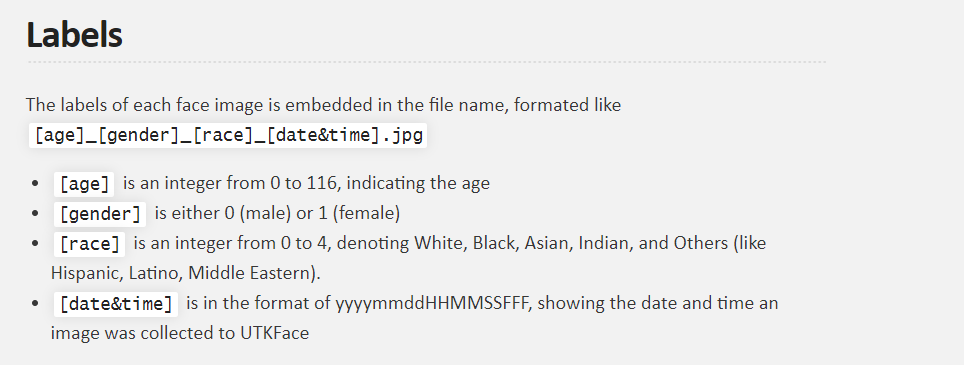

In [ ]:
import tensorflow as tf

## Create DataFrame with Dataset Details

In [ ]:
import pandas as pd
train_df = pd.DataFrame()
test_df = pd.DataFrame()
import os
train_df['filename']=os.listdir(train_dir)
test_df['filename'] = os.listdir(test_dir)

In [ ]:
train_df['label'] = train_df['filename'].apply(lambda x : x.split('.')[0].split('_')[1])
test_df['label'] = test_df['filename'].apply(lambda x : x.split('.')[0].split('_')[1])

In [ ]:
# /content/UTK/crop_part1/10_0_0_20170110221719390.jpg.chip.jpg
# /content/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg

In [ ]:
train_df['comp_filepath'] = '/content/UTKFace/' + train_df['filename']
test_df['comp_filepath'] = '/content/UTK/crop_part1/' + test_df['filename']


In [ ]:
train_df['comp_filepath'][0]

'/content/UTKFace/31_1_0_20170117133437320.jpg.chip.jpg'

In [ ]:
train_df.head()

,filename,label,comp_filepath
0,31_1_0_20170117133437320.jpg.chip.jpg,1,/content/UTKFace/31_1_0_20170117133437320.jpg....
1,30_0_2_20170112205508972.jpg.chip.jpg,0,/content/UTKFace/30_0_2_20170112205508972.jpg....
2,72_0_0_20170111221945926.jpg.chip.jpg,0,/content/UTKFace/72_0_0_20170111221945926.jpg....
3,26_1_0_20170103181112840.jpg.chip.jpg,1,/content/UTKFace/26_1_0_20170103181112840.jpg....
4,52_1_0_20170119202531405.jpg.chip.jpg,1,/content/UTKFace/52_1_0_20170119202531405.jpg....


In [ ]:
train_df.shape, test_df.shape

((23708, 3), (575, 3))

In [ ]:
train_df['label'].value_counts()

0    12391
1    11317
Name: label, dtype: int64

In [ ]:
test_df['label'].value_counts()

1    311
0    264
Name: label, dtype: int64

## Image DataGenerator -> flow from dataframe

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
IMAGE_SHAPE = (180, 180)
BATCH_SIZE = 32


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_dataframe(train_df,directory = '/content/UTKFace', x_xol ='comp_filepath',y_col = 'label',class_mode = 'binary', batch_size = BATCH_SIZE,target_size = IMAGE_SHAPE)

test_data =test_datagen.flow_from_dataframe(test_df,directory = '/content/UTK/crop_part1/', x_xol ='comp_filepath',y_col = 'label',class_mode = 'binary', batch_size = BATCH_SIZE, target_size = IMAGE_SHAPE)



Found 23708 validated image filenames belonging to 2 classes.
Found 575 validated image filenames belonging to 2 classes.


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #Plot the Loss Graph
  plt.plot(epochs, loss, label = 'train_loss')
  plt.plot(epochs,val_loss,label = 'val_loss')
  plt.title('Loss vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  #Plot the Accuracy Graph
  plt.figure()
  plt.plot(epochs,acc,label = 'train_accuracy')
  plt.plot(epochs,val_acc,label = 'val_accuracy')
  plt.title('Accuracy vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend();

## Transfer Learning -> Efficient Net Model Creation

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

## Function : Tensorflow Hub Model

In [ ]:
def create_model(model_url,num_classes = 10):
  feature_extraction_layer = hub.KerasLayer(model_url,trainable = False,name = 'feature_extraction_layer',input_shape = IMAGE_SHAPE + (3,))
  model = tf.keras.Sequential([
                               feature_extraction_layer,
                               layers.Dense(1, activation = 'sigmoid', name= 'final_output_layer')
  ])
  return model

In [ ]:
efficientnet_model = create_model(model_url = efficientnet_url,
                                  num_classes = 2)

In [ ]:
efficientnet_model.compile(loss='binary_crossentropy',
                           optimizer = 'Adam',
                           metrics = ['accuracy'])

## Model Summary
* Contains Efficient Net pretrained model in 'feature_extraction_layer'
* Final output layer is a sigmoid layer for Male or Female

In [ ]:
efficientnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1280)              4049564   
_________________________________________________________________
final_output_layer (Dense)   (None, 1)                 1281      
Total params: 4,050,845
Trainable params: 1,281
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs = 7,
                                              validation_data = test_data
                                              )

Epoch 1/7
741/741 [==============================] - 80s 58ms/step - loss: 0.3480 - accuracy: 0.8455 - val_loss: 0.3691 - val_accuracy: 0.8313
Epoch 2/7
741/741 [==============================] - 41s 55ms/step - loss: 0.2942 - accuracy: 0.8751 - val_loss: 0.3523 - val_accuracy: 0.8348
Epoch 3/7
741/741 [==============================] - 41s 55ms/step - loss: 0.2795 - accuracy: 0.8812 - val_loss: 0.3336 - val_accuracy: 0.8487
Epoch 4/7
741/741 [==============================] - 41s 55ms/step - loss: 0.2700 - accuracy: 0.8871 - val_loss: 0.3188 - val_accuracy: 0.8522
Epoch 5/7
741/741 [==============================] - 41s 55ms/step - loss: 0.2632 - accuracy: 0.8905 - val_loss: 0.3117 - val_accuracy: 0.8522
Epoch 6/7
741/741 [==============================] - 41s 55ms/step - loss: 0.2584 - accuracy: 0.8936 - val_loss: 0.3108 - val_accuracy: 0.8539
Epoch 7/7
741/741 [==============================] - 40s 54ms/step - loss: 0.2548 - accuracy: 0.8940 - val_loss: 0.3279 - val_accuracy: 0.8539

In [ ]:
efficientnet_model.save('efficientnet_Gender_detection.h5')

In [ ]:
efficientnet_model.evaluate(test_data)

18/18 [==============================] - 1s 56ms/step - loss: 0.3279 - accuracy: 0.8539


[0.3279443681240082, 0.8539130687713623]

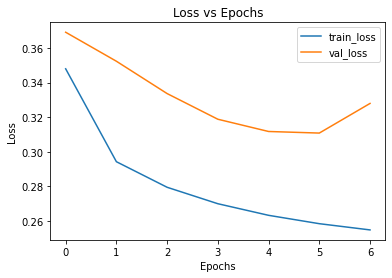

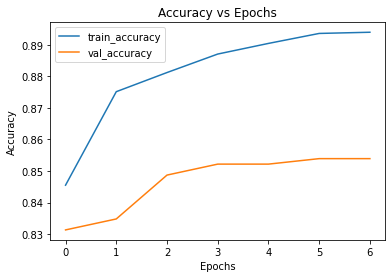

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
imgs,labels =test_data.next()

In [ ]:
import random
ran = random.randint(10)


(32, 180, 180, 3)

In [ ]:
imgs[0].shape

(180, 180, 3)

### Predictions on Test data

In [ ]:
y_preds = tf.round(efficientnet_model.predict(imgs))

In [ ]:
tf.squeeze(y_preds).numpy()

array([0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.],
      dtype=float32)

In [ ]:
y_preds[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
import numpy as np
np.argmax(y_preds)

1

In [ ]:
y_preds_labels = ['Male' if i ==0 else 'Female' for i in y_preds]

## Predicting on Test Data

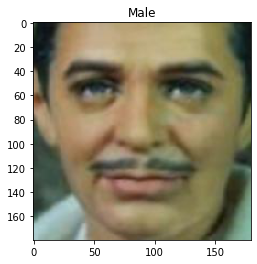

In [ ]:
plt.title(y_preds_labels[0])
plt.imshow(imgs[0])

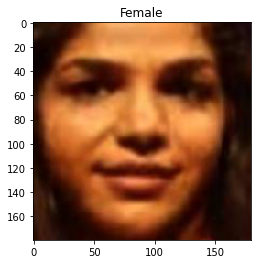

In [ ]:
plt.title(y_preds_labels[2])
plt.imshow(imgs[2])

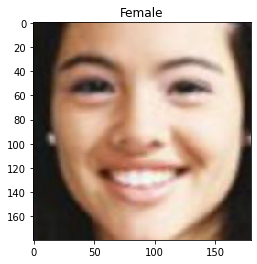

In [ ]:
plt.title(y_preds_labels[3])
plt.imshow(imgs[3])

## Save Model to .json and weights to h5 file

In [ ]:
model_json = efficientnet_model.to_json()
with open("gender_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
efficientnet_model.save_weights("gender_model.h5")

In [ ]:
efficientnet_model.save('gender_detection.json')

INFO:tensorflow:Assets written to: gender_detection.json/assets


INFO:tensorflow:Assets written to: gender_detection.json/assets


### Exploring predictions to find appropriate format for open cv prediction

In [ ]:
predictions = efficientnet_model.predict(imgs)


In [ ]:
predictions

array([[0.12255727],
       [0.9992206 ],
       [0.77043885],
       [0.956195  ],
       [0.01969472],
       [0.15096809],
       [0.94396144],
       [0.7827098 ],
       [0.98376805],
       [0.98485273],
       [0.90328753],
       [0.03685925],
       [0.00571907],
       [0.01930418],
       [0.9092116 ],
       [0.59633595],
       [0.09596457],
       [0.9967595 ],
       [0.8483121 ],
       [0.22607884],
       [0.05612956],
       [0.40729237],
       [0.78531873],
       [0.92504543],
       [0.7475898 ],
       [0.03334548],
       [0.24235485],
       [0.97420424],
       [0.99101907],
       [0.04380806],
       [0.26897135],
       [0.95676625]], dtype=float32)

In [ ]:
tf.squeeze(efficientnet_model.predict_classes(imgs)).numpy()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int32)

In [ ]:
predictions[0]

array([0.12255727], dtype=float32)

In [ ]:
np.argmax(predictions,axis =0)

array([1])

In [ ]:
predictions.shape

(32, 1)

In [ ]:
for i in predictions:
  print(np.round(i))

[0.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[0.]
[0.]
[1.]


# Real Time Gender Detection Using OpenCV and Haarcascade

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

In [ ]:
#Save this code as file_name.py
#Save the fer.json file, model_filter.h5 file, and this code in the same folder
#Run it in your local system to recognize facial expression in real-time. 
#You can use Pycharm or Anaconda CLI to execute this section

import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

#load model


from tensorflow.keras.models import model_from_json

import tensorflow_hub as hub

with open('gender_model.json', 'r') as f: 
    json = f.read() 
loaded_model = model_from_json(json, custom_objects={'KerasLayer': hub.KerasLayer})



#load weight
loaded_model.load_weights('gender_model.h5')






face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
#     gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(test_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=test_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(180,180))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255
        print(img_pixels.shape)

        predictions = loaded_model.predict_classes(img_pixels)

        #find max indexed array
        

        emotions = ('Male', 'Female')
        predicted_emotion = emotions[tf.squeeze(predictions)]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)


    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

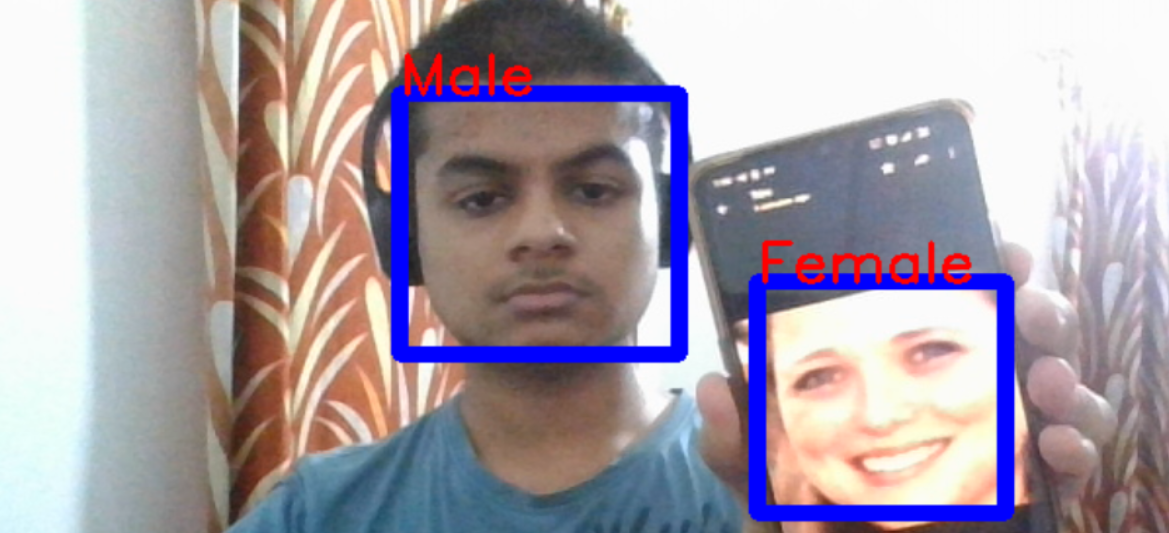